In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as smf
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from functools import reduce
import numpy as np
#import ee
#import geemap
import geopandas as gpd
import rioxarray as rxr
import rasterstats as rs
from rasterio.plot import show
import rasterio
import cartopy.crs as ccrs
import gdal
%matplotlib inline
plt.rcParams["font.family"] = "Arial"

In [67]:
ndvi_irri = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ndvi_irrigated.csv')[['ADM3_EN','yr1','yr5']]
ndvi_rf =pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ndvi_rainfed.csv')[['ADM3_EN','yr1','yr5']]
ndvi_all = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ndvi_all.csv')[['ADM3_EN','yr1','yr5']]
#ndvi_all

# 5 YEAR INCREMENTS
## Irrigated Rice


In [68]:
points = '/Users/delatorredm/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Ch4_Climate_Impacts/geospatial_layers/out5yr/intersect_DS_5yr.shp'
#points = '/Users/delatorredm/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Ch4_Climate_Impacts/geospatial_layers/out2017/intersect_DS_2017.shp'
points = gpd.read_file(points)

startYear = 2013
#startYear = 2017
endYear = 2017

actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'irri')].reset_index(drop=True)
actualFixed = actual.rename(columns={'muni':'ADM3_EN','year':'Date'}).drop(columns=['ecosystem'])
actualFixed= actualFixed[(actualFixed.Date <= endYear) & (actualFixed.Date >= startYear)].groupby(['ADM3_EN','param']).mean().reset_index(drop=False)
#actualFixed

points2 = points.loc[points['Class']=='Irrigated Rice'].groupby(['ADM3_EN']).mean().reset_index(drop=False)

merged = pd.merge(actualFixed, points2, left_on='ADM3_EN', right_on='ADM3_EN')
df = merged.rename(columns={'value':'actualYield','ch3_slope':'slope','ch3_elevat':'elevation'})
df = pd.DataFrame(df)

df1 = df.loc[df['ADM3_EN'].isin(['San Miguel',
'Oton',
'Barotac Viejo',
'Iloilo City',
'Leganes',
'Mina',
'Dingle',
'New Lucena',
'Santa Barbara',
'Pototan'])].reset_index(drop=True)


df2 = df.loc[df['ADM3_EN'].isin([
'Zarraga',
'Anilao',
'Dumangas',
'Janiuay',
'Banate',
'Barotac Nuevo',
])].reset_index(drop=True)


## Rain-fed rice

In [69]:
points = '/Users/delatorredm/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Ch4_Climate_Impacts/geospatial_layers/out5yr/intersect_DS_5yr.shp'
#points = '/Users/delatorredm/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Ch4_Climate_Impacts/geospatial_layers/out2017/intersect_DS_2017.shp'

points = gpd.read_file(points)

startYear = 2013
endYear = 2017
actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'rf')].reset_index(drop=True)
actualFixed = actual.rename(columns={'muni':'ADM3_EN','year':'Date'}).drop(columns=['ecosystem'])
actualFixed= actualFixed[(actualFixed.Date <= endYear) & (actualFixed.Date >= startYear)].groupby(['ADM3_EN','param']).mean().reset_index(drop=False)

points2 = points.loc[points['Class']=='Rain-fed Rice'].groupby(['ADM3_EN']).mean().reset_index(drop=False)

merged = pd.merge(actualFixed, points2, left_on='ADM3_EN', right_on='ADM3_EN')
merged

df = merged.rename(columns={'value':'actualYield','ch3_slope':'slope','ch3_elevat':'elevation'})
df = pd.DataFrame(df)

# RF I
df3 = df.loc[df['ADM3_EN'].isin([
'Alimodian',
'Cabatuan',
'Guimbal',
'Igbaras',
'Leganes',
'Leon',
'Maasin',
'Miagao',
'Oton',
'Pavia',
'San Joaquin',
'San Miguel',
'Santa Barbara',
'Tigbauan',
'Tubungan',
])].reset_index(drop=True)

# RF II
df4 = df.loc[df['ADM3_EN'].isin([
'Anilao',
'Badiangan',
'Banate',
'Barotac Nuevo',
'Barotac Viejo',
'Bingawan',
'Calinog',
'City of Passi',
'Dingle',
'Dumangas',
'Janiuay',
'Lambunao',
'Mina',
'New Lucena',
'Pototan',
'San Enrique',
'San Rafael',
'Zarraga',
])].reset_index(drop=True)

# RF III
df5 = df.loc[df['ADM3_EN'].isin([
'Ajuy',
'Balasan',
'Batad',
'Carles',
'Concepcion',
'Estancia',
'Lemery',
'San Dionisio',
])].reset_index(drop=True)


<AxesSubplot:xlabel='Ecosystem', ylabel='Cumulative Precipication (mm)'>

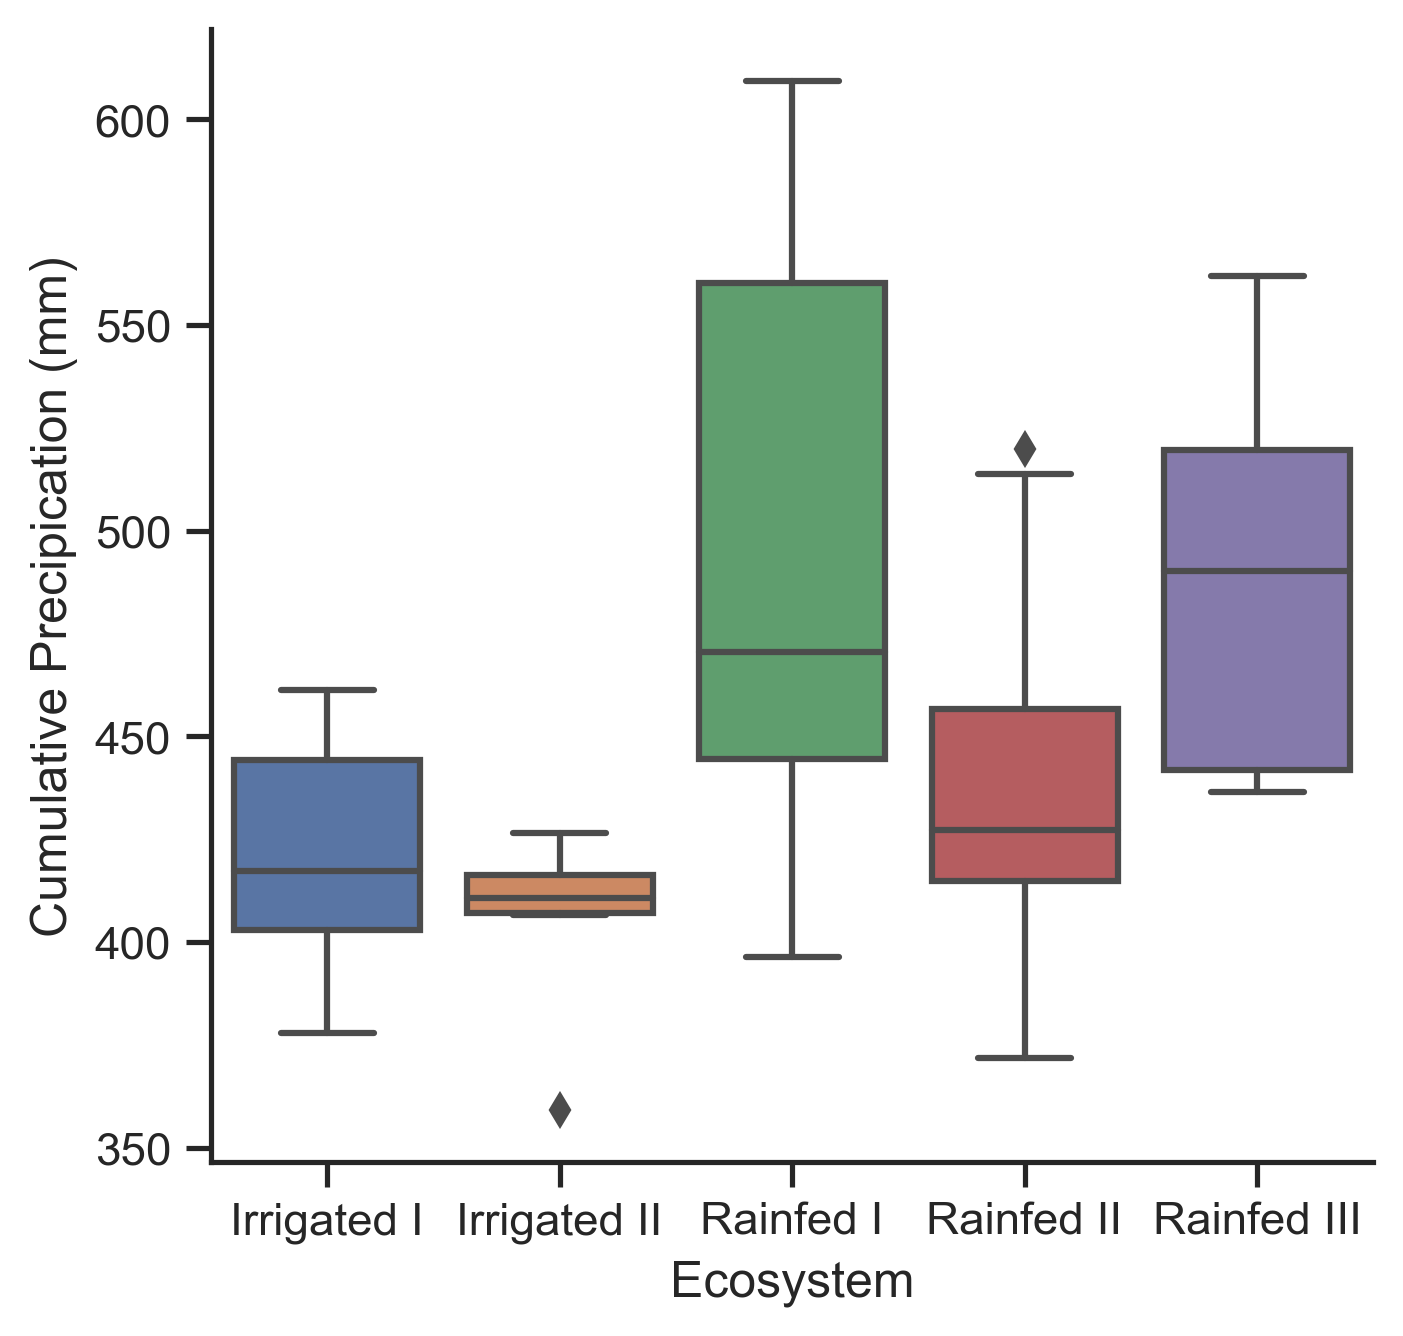

In [118]:
# Precipitation

value = 'pcp'
value_name = 'Cumulative Precipication (mm)'
mdf1 = pd.DataFrame(df1[value]).rename(columns={value:'Irrigated I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf2 = pd.DataFrame(df2[value]).rename(columns={value:'Irrigated II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf3 = pd.DataFrame(df3[value]).rename(columns={value:'Rainfed I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf4 = pd.DataFrame(df4[value]).rename(columns={value:'Rainfed II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf5 = pd.DataFrame(df5[value]).rename(columns={value:'Rainfed III'}).melt(var_name='Ecosystem', value_name=value_name)

list_df = [mdf1, mdf2, mdf3, mdf4, mdf5]
concat_df = pd.concat(list_df).reset_index(drop=True)

custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.dpi":300, "figure.figsize":(5,5)}
sns.set_theme(style="ticks", rc=custom_params)

sns.boxplot(x='Ecosystem', 
            y=value_name, 
            data=concat_df
           )

<AxesSubplot:xlabel='Ecosystem', ylabel='Average Evapotranspiration (kg/m2/8day)'>

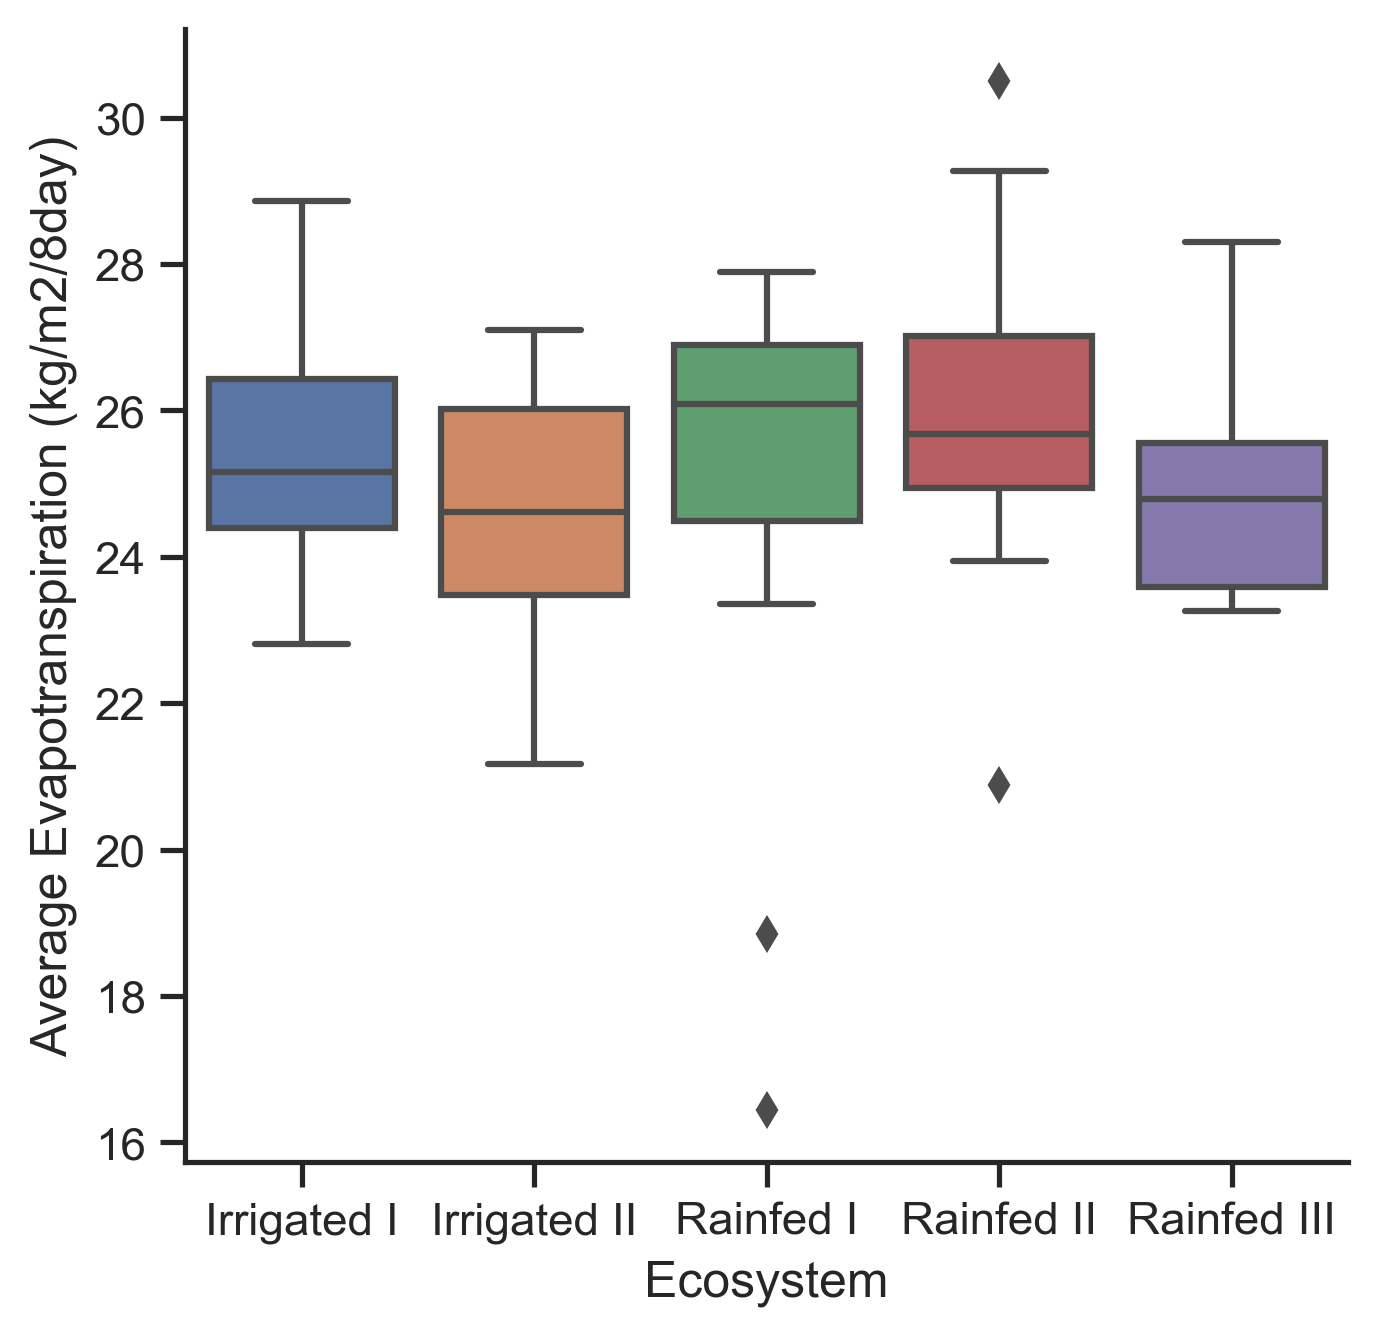

In [119]:
# Evapotranspiration

value = 'et'
value_name = 'Average Evapotranspiration (kg/m2/8day)'
mdf1 = pd.DataFrame(df1[value]).rename(columns={value:'Irrigated I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf2 = pd.DataFrame(df2[value]).rename(columns={value:'Irrigated II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf3 = pd.DataFrame(df3[value]).rename(columns={value:'Rainfed I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf4 = pd.DataFrame(df4[value]).rename(columns={value:'Rainfed II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf5 = pd.DataFrame(df5[value]).rename(columns={value:'Rainfed III'}).melt(var_name='Ecosystem', value_name=value_name)

list_df = [mdf1, mdf2, mdf3, mdf4, mdf5]
concat_df = pd.concat(list_df).reset_index(drop=True)

custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.dpi":300, "figure.figsize":(5,5)}
sns.set_theme(style="ticks", rc=custom_params)

sns.boxplot(x='Ecosystem', 
            y=value_name, 
            data=concat_df
           )

<AxesSubplot:xlabel='Ecosystem', ylabel='Average Potential Evapotranspiration (kg/m2/8day)'>

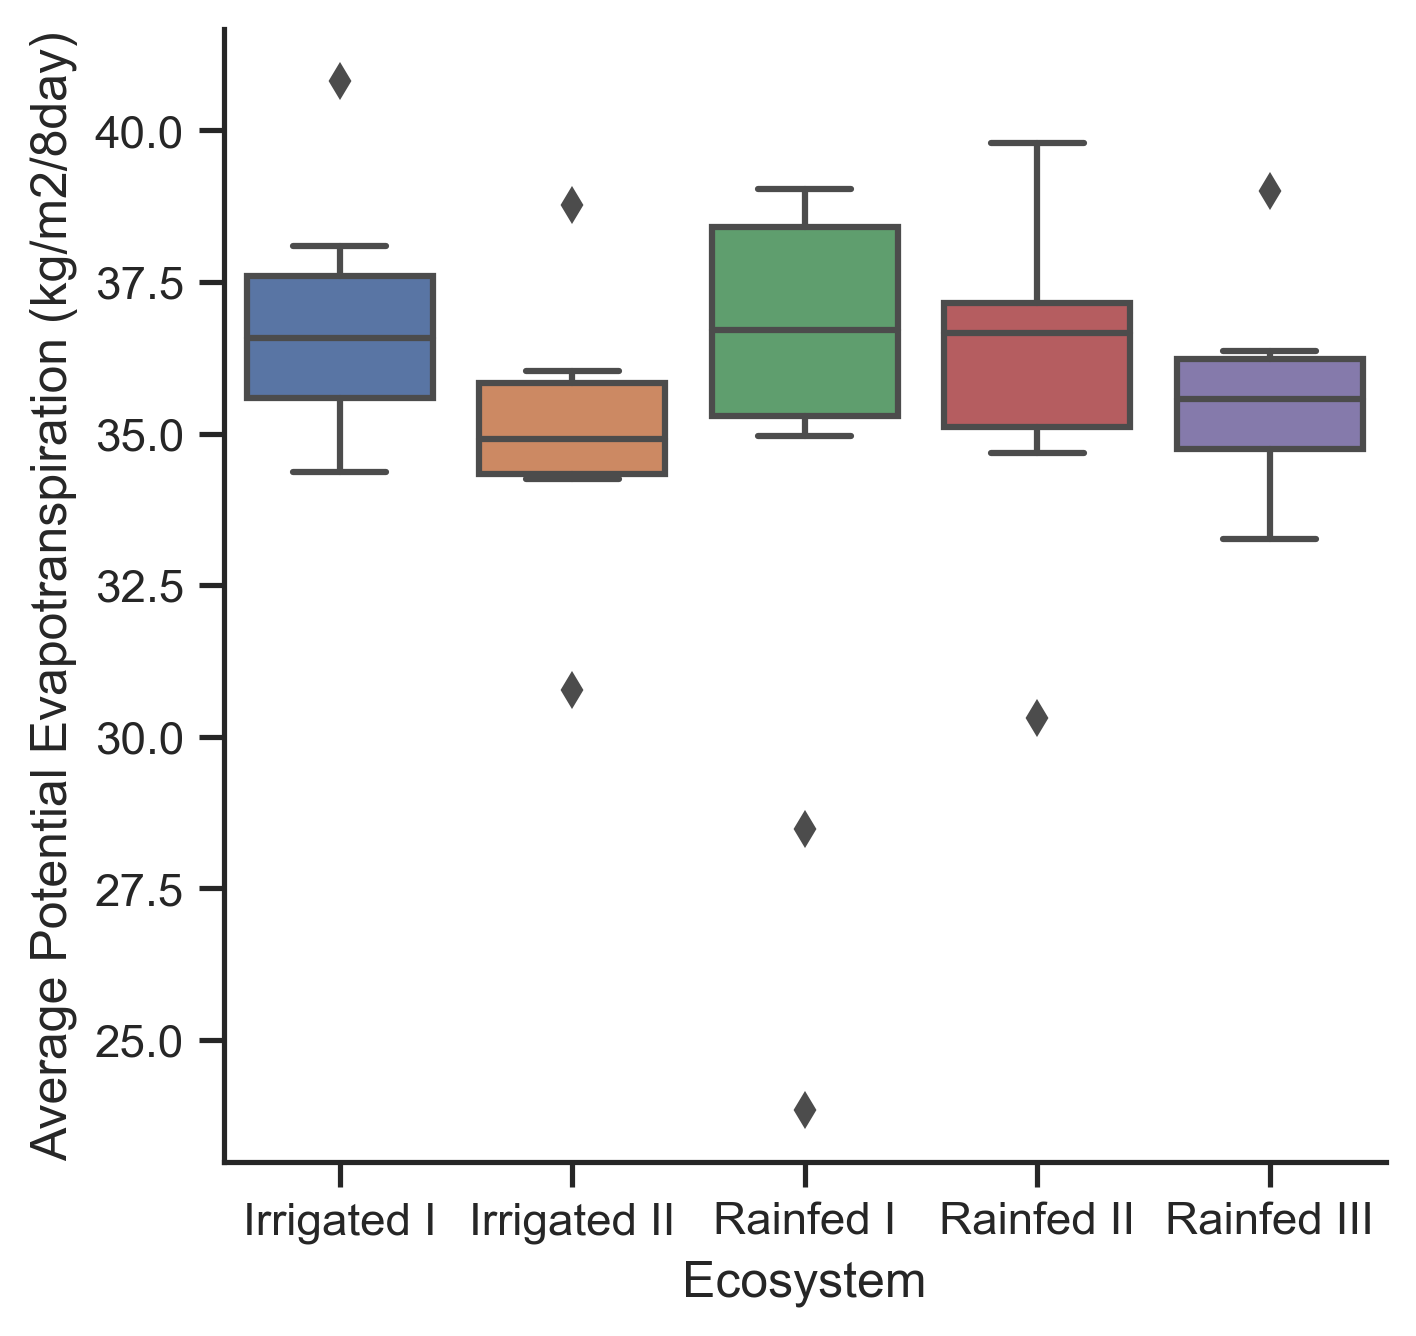

In [120]:
# POT Evapotranspiration

value = 'pet'
value_name = 'Average Potential Evapotranspiration (kg/m2/8day)'
mdf1 = pd.DataFrame(df1[value]).rename(columns={value:'Irrigated I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf2 = pd.DataFrame(df2[value]).rename(columns={value:'Irrigated II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf3 = pd.DataFrame(df3[value]).rename(columns={value:'Rainfed I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf4 = pd.DataFrame(df4[value]).rename(columns={value:'Rainfed II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf5 = pd.DataFrame(df5[value]).rename(columns={value:'Rainfed III'}).melt(var_name='Ecosystem', value_name=value_name)

list_df = [mdf1, mdf2, mdf3, mdf4, mdf5]
concat_df = pd.concat(list_df).reset_index(drop=True)

custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.dpi":300, "figure.figsize":(5,5)}
sns.set_theme(style="ticks", rc=custom_params)

sns.boxplot(x='Ecosystem', 
            y=value_name, 
            data=concat_df
           )

<AxesSubplot:xlabel='Ecosystem', ylabel='Average Daytime Temperature ($^\\circ C$)'>

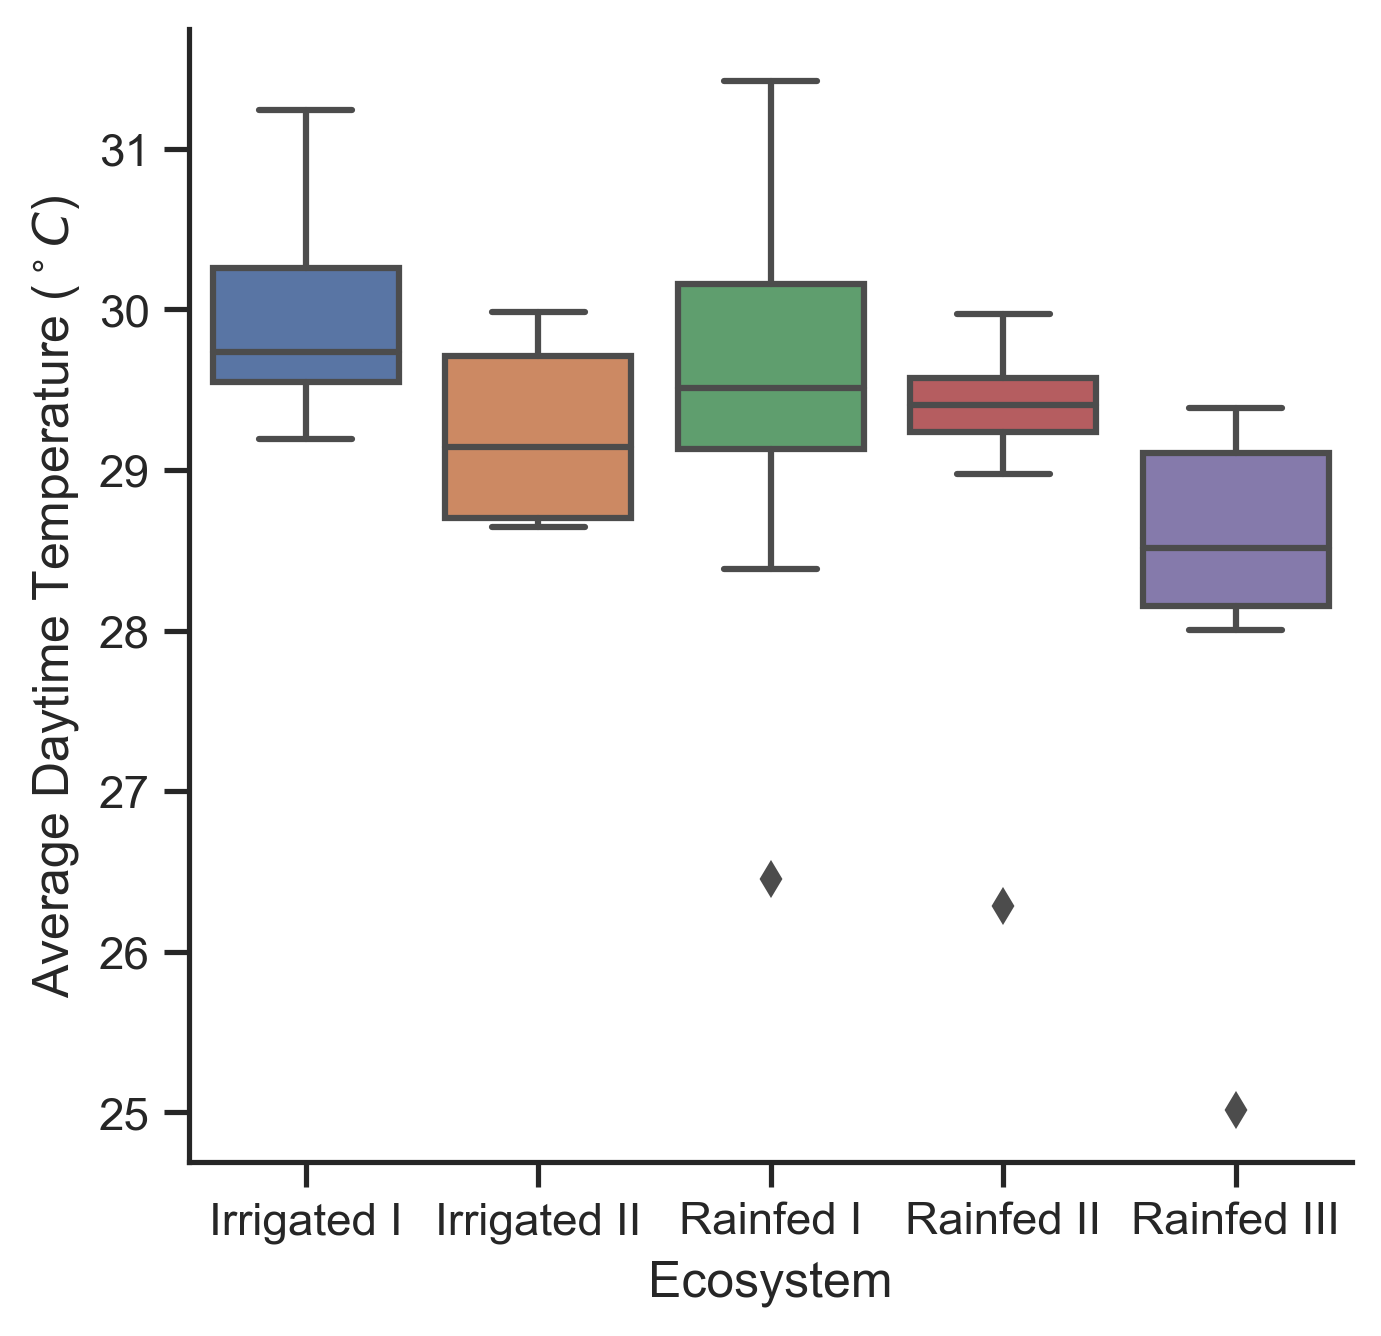

In [127]:
# LST DAT

value = 'lstday'
value_name = 'Average Daytime Temperature ($^\circ C$)'
mdf1 = pd.DataFrame(df1[value]).rename(columns={value:'Irrigated I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf2 = pd.DataFrame(df2[value]).rename(columns={value:'Irrigated II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf3 = pd.DataFrame(df3[value]).rename(columns={value:'Rainfed I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf4 = pd.DataFrame(df4[value]).rename(columns={value:'Rainfed II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf5 = pd.DataFrame(df5[value]).rename(columns={value:'Rainfed III'}).melt(var_name='Ecosystem', value_name=value_name)

list_df = [mdf1, mdf2, mdf3, mdf4, mdf5]
concat_df = pd.concat(list_df).reset_index(drop=True)

custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.dpi":300, "figure.figsize":(5,5)}
sns.set_theme(style="ticks", rc=custom_params)

sns.boxplot(x='Ecosystem', 
            y=value_name, 
            data=concat_df
           )

<AxesSubplot:xlabel='Ecosystem', ylabel='Average Nighttime Temperature ($^\\circ C$)'>

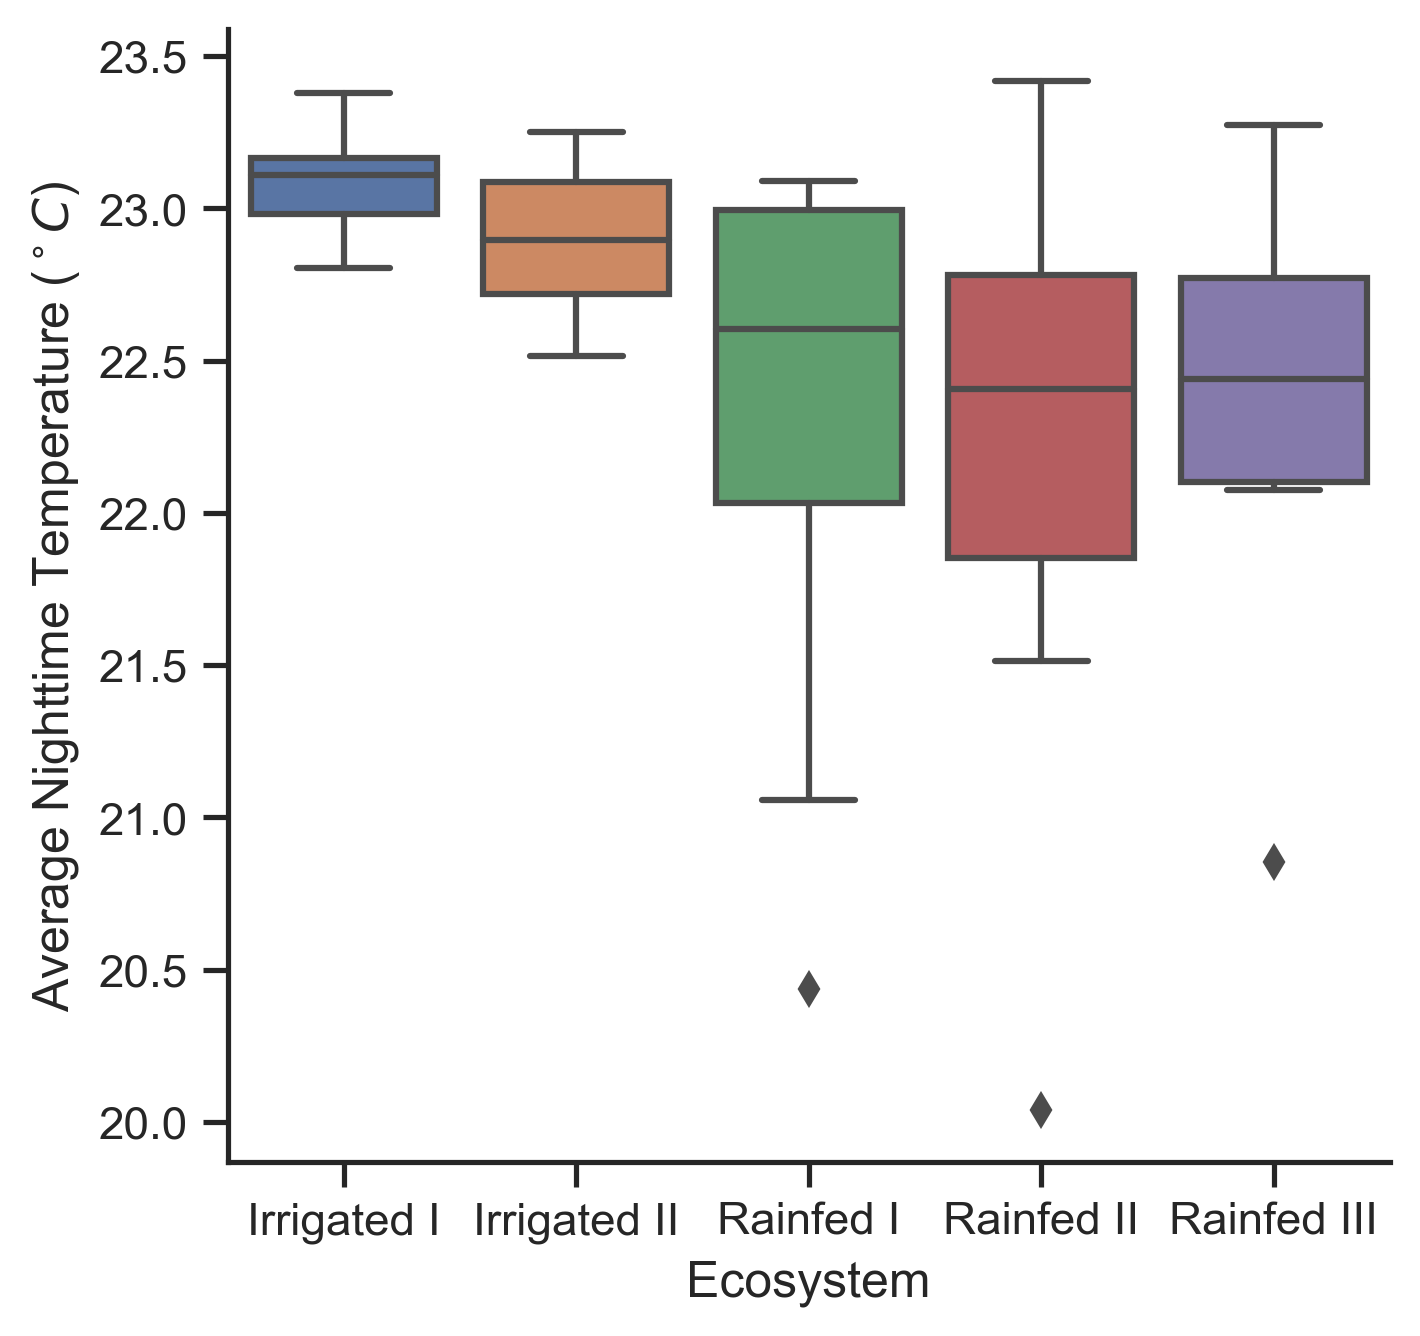

In [128]:
# LST NIGHT

value = 'lstnight'
value_name = 'Average Nighttime Temperature ($^\circ C$)'
mdf1 = pd.DataFrame(df1[value]).rename(columns={value:'Irrigated I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf2 = pd.DataFrame(df2[value]).rename(columns={value:'Irrigated II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf3 = pd.DataFrame(df3[value]).rename(columns={value:'Rainfed I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf4 = pd.DataFrame(df4[value]).rename(columns={value:'Rainfed II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf5 = pd.DataFrame(df5[value]).rename(columns={value:'Rainfed III'}).melt(var_name='Ecosystem', value_name=value_name)

list_df = [mdf1, mdf2, mdf3, mdf4, mdf5]
concat_df = pd.concat(list_df).reset_index(drop=True)

custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.dpi":300, "figure.figsize":(5,5)}
sns.set_theme(style="ticks", rc=custom_params)

sns.boxplot(x='Ecosystem', 
            y=value_name, 
            data=concat_df
           )

<AxesSubplot:xlabel='Ecosystem', ylabel='Elevation (m)'>

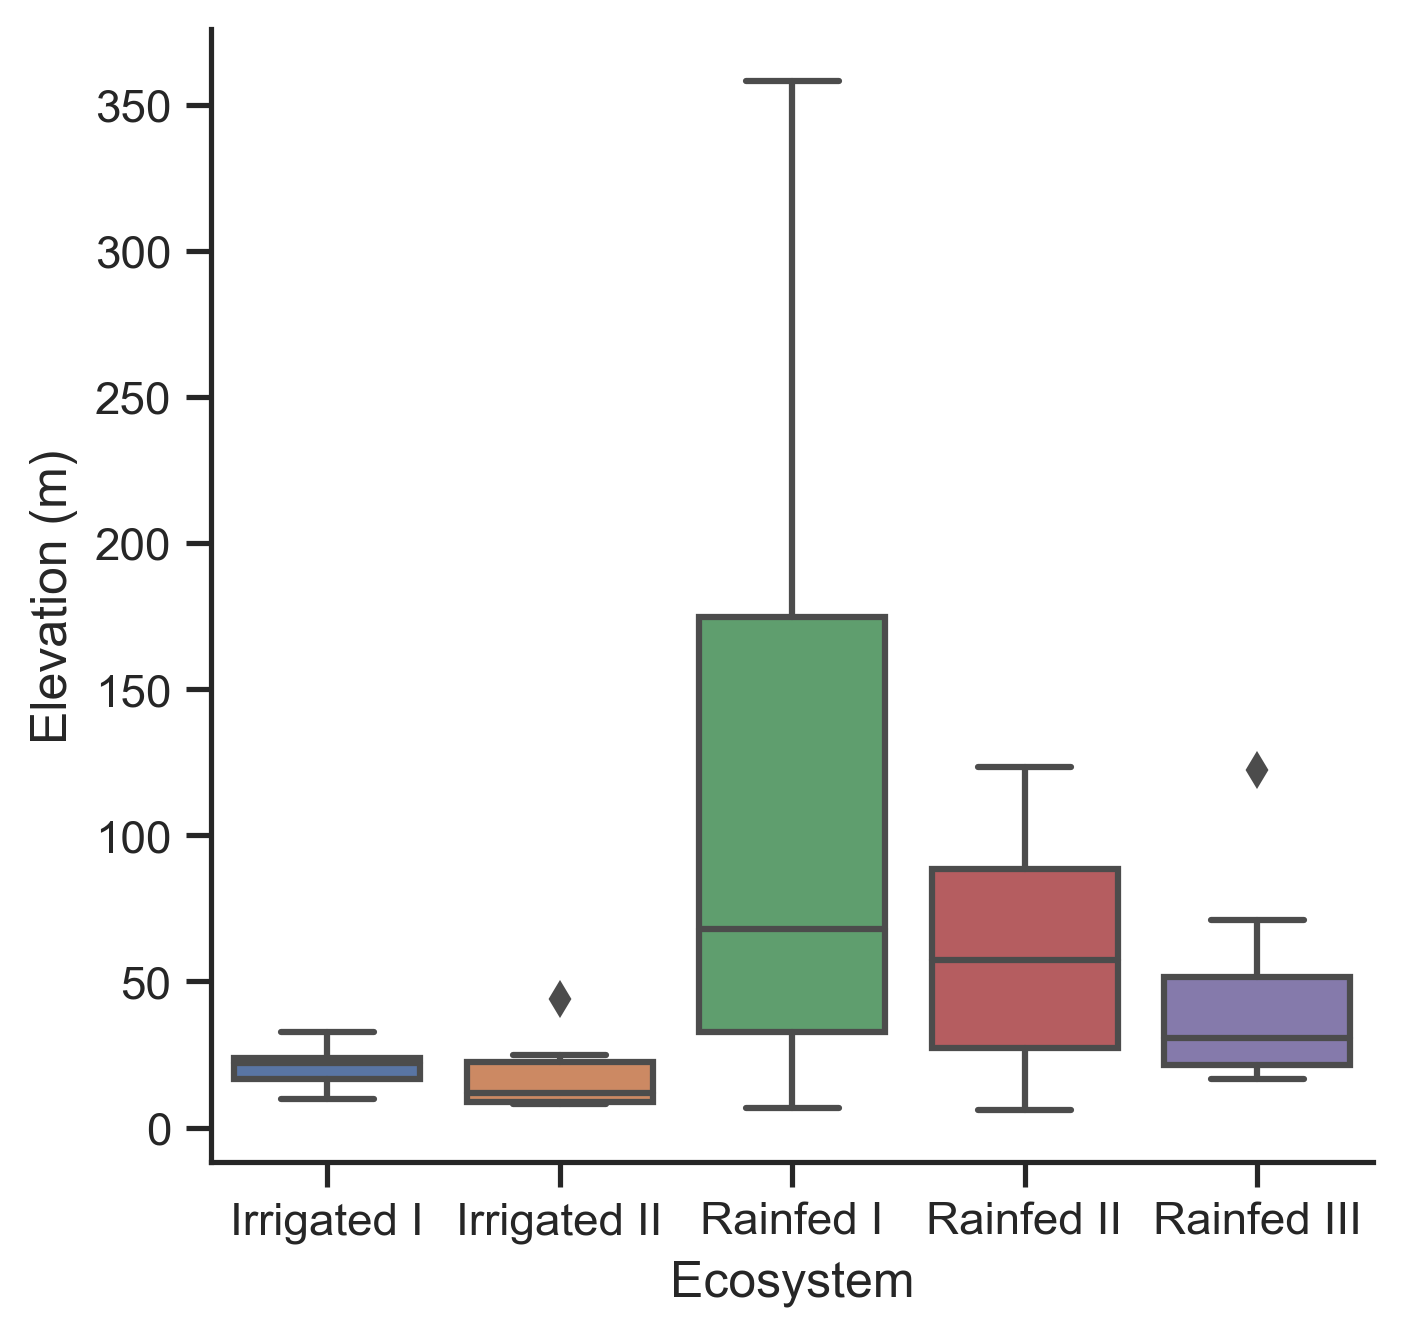

In [129]:
# ELEVATION

value = 'elevation'
value_name = 'Elevation (m)'
mdf1 = pd.DataFrame(df1[value]).rename(columns={value:'Irrigated I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf2 = pd.DataFrame(df2[value]).rename(columns={value:'Irrigated II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf3 = pd.DataFrame(df3[value]).rename(columns={value:'Rainfed I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf4 = pd.DataFrame(df4[value]).rename(columns={value:'Rainfed II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf5 = pd.DataFrame(df5[value]).rename(columns={value:'Rainfed III'}).melt(var_name='Ecosystem', value_name=value_name)

list_df = [mdf1, mdf2, mdf3, mdf4, mdf5]
concat_df = pd.concat(list_df).reset_index(drop=True)

custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.dpi":300, "figure.figsize":(5,5)}
sns.set_theme(style="ticks", rc=custom_params)

sns.boxplot(x='Ecosystem', 
            y=value_name, 
            data=concat_df
           )

<AxesSubplot:xlabel='Ecosystem', ylabel='Slope ($^\\circ$)'>

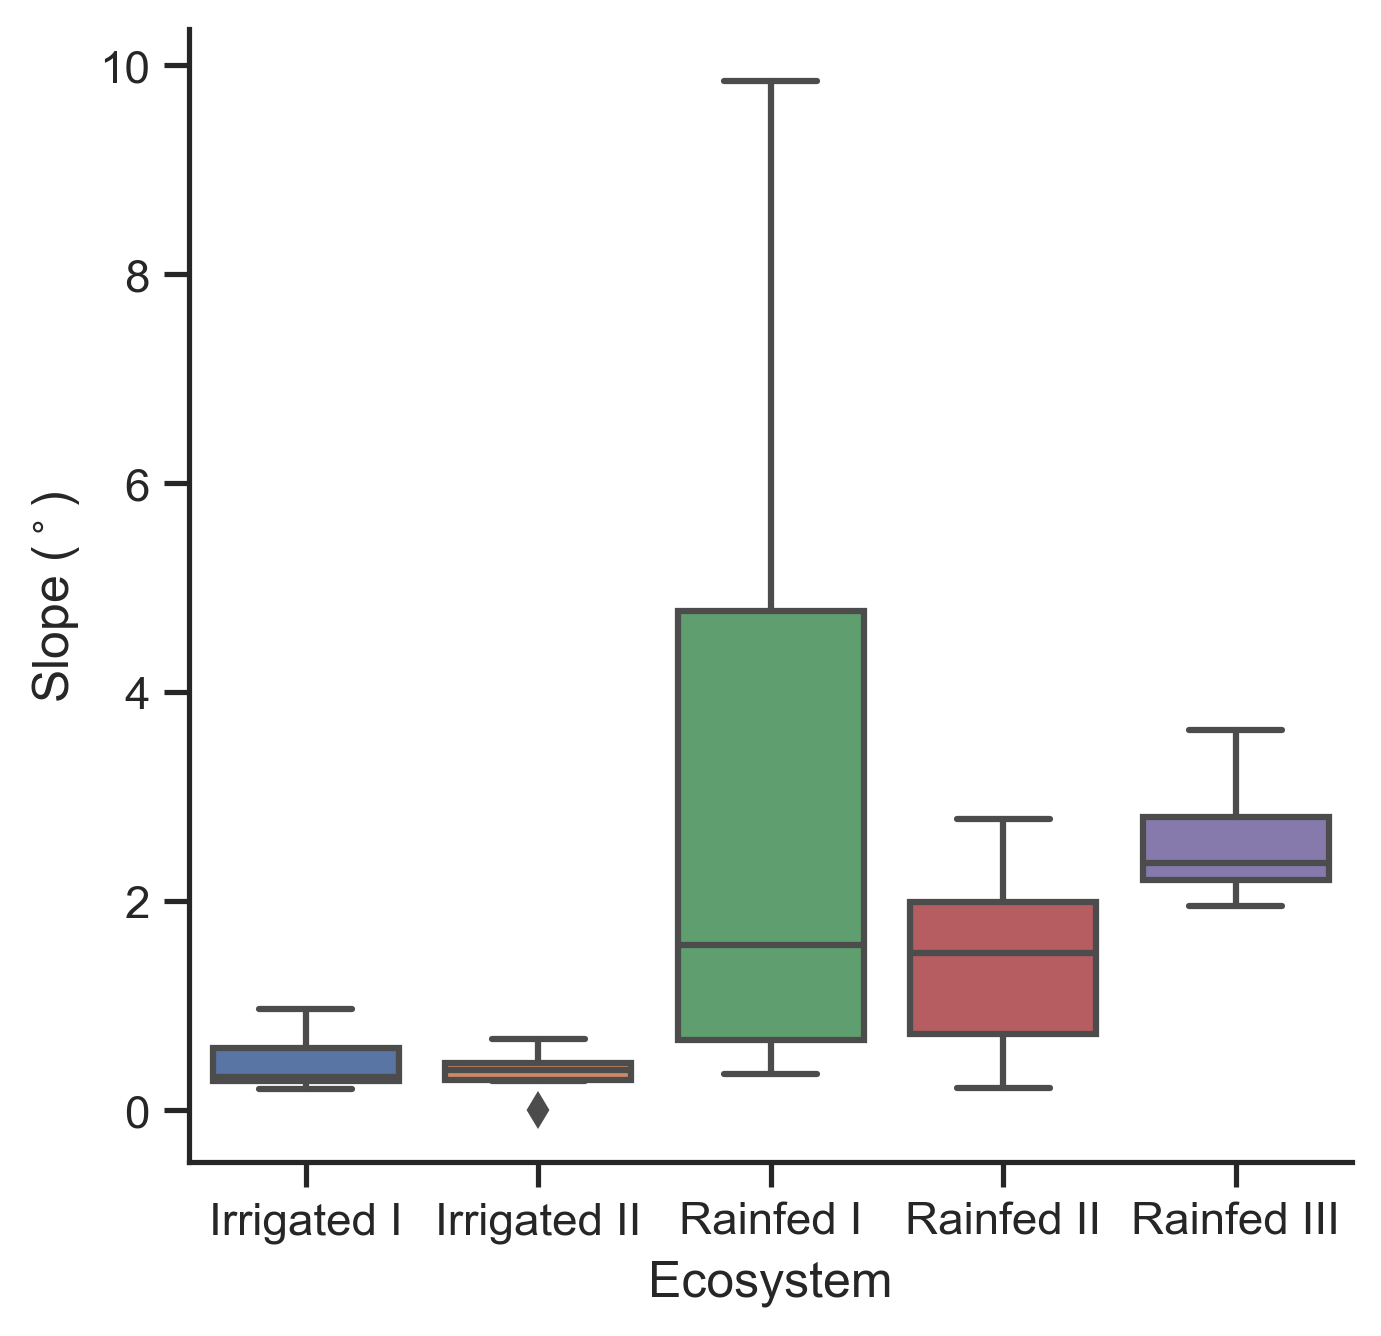

In [132]:
# slp

value = 'slope'
value_name = 'Slope ($^\circ$)'
mdf1 = pd.DataFrame(df1[value]).rename(columns={value:'Irrigated I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf2 = pd.DataFrame(df2[value]).rename(columns={value:'Irrigated II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf3 = pd.DataFrame(df3[value]).rename(columns={value:'Rainfed I'}).melt(var_name='Ecosystem', value_name=value_name)
mdf4 = pd.DataFrame(df4[value]).rename(columns={value:'Rainfed II'}).melt(var_name='Ecosystem', value_name=value_name)
mdf5 = pd.DataFrame(df5[value]).rename(columns={value:'Rainfed III'}).melt(var_name='Ecosystem', value_name=value_name)

list_df = [mdf1, mdf2, mdf3, mdf4, mdf5]
concat_df = pd.concat(list_df).reset_index(drop=True)

custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.dpi":300, "figure.figsize":(5,5)}
sns.set_theme(style="ticks", rc=custom_params)

sns.boxplot(x='Ecosystem', 
            y=value_name, 
            data=concat_df
           )